In [1]:
import pandas as pd
import numpy as np
from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt
import gffpandas.gffpandas as gffpd

In [ ]:
ERG_uniprotID = "P11308"
ERG_ENST = "ENST00000398919"

In [2]:
SFARI_TFs = pd.read_csv("../data/SFARI_TFs_with_ENST.csv")
SFARI_TFs

,Unnamed: 0.1,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq,uniprotID,ENST
0,0,0,9,ADNP,Activity-dependent neuroprotector homeobox,ENSG00000101126,20,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,41.50,64,sp|Q9H2P0|ADNP_HUMAN,MFQLPVNNLGSLRKARKTVKKILSDIGLEYCKEHIEDFKQFEPNDF...,Q9H2P0,ENST00000349014.8
1,1,1,9,AHDC1,AT-hook DNA binding motif containing 1,ENSG00000126705,1,"Rare Single Gene Mutation, Syndromic",1.0,1,14.25,24,sp|Q5TGY3|AHDC1_HUMAN,MRVKPQGLVVTSSAVCSSPDYLREPKYYPGGPPTPRPLLPTRPPAS...,Q5TGY3,ENST00000247087.10
2,2,2,9,ARID2,AT-rich interaction domain 2,ENSG00000189079,12,"Rare Single Gene Mutation, Syndromic",2.0,1,NaN,12,sp|Q68CP9|ARID2_HUMAN,MANSTGKAPPDERRKGLAFLDELRQFHHSRGSPFKKIPAVGGKELD...,Q68CP9,ENST00000334344.11
3,3,3,9,ARNT2,aryl-hydrocarbon receptor nuclear translocator 2,ENSG00000172379,15,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,0,NaN,15,sp|Q9HBZ2|ARNT2_HUMAN,MATPAAVNPPEMASDIPGSVTLPVAPMAATGQVRMAGAMPARGGKR...,Q9HBZ2,ENST00000303329.9
4,4,4,9,ARX,aristaless related homeobox,ENSG00000004848,X,"Rare Single Gene Mutation, Syndromic",1.0,1,13.80,24,sp|Q96QS3|ARX_HUMAN,MSNQYQEEGCSERPECKSKSPTLLSSYCIDSILGRRSPCKMRLLGA...,Q96QS3,ENST00000379044.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,122,9,ZNF711,zinc finger protein 711,ENSG00000147180,X,Rare Single Gene Mutation,2.0,0,NaN,5,sp|Q9Y462|ZN711_HUMAN,MDSGGGSLGLHTPDSRMAHTMIMQDFVAGMAGTAHIDGDHIVVSVP...,Q9Y462,ENST00000276123.7
118,118,123,9,ZNF713,Zinc finger protein 713,ENSG00000178665,7,Rare Single Gene Mutation,2.0,0,NaN,3,sp|Q8N859|ZN713_HUMAN,MEEEEMNDGSQMVRSQESLTFQDVAVDFTREEWDQLYPAQKNLYRD...,Q8N859,ENST00000429591.4
119,119,124,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,4,sp|Q6NX45|ZN774_HUMAN,MWLGTSGKSGLPGHCLENPLQECHPAQLEEWALKGISRPSVISQPE...,Q6NX45,ENST00000354377.8
120,120,125,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,16,sp|Q7Z570|Z804A_HUMAN,MECYYIVISSTHLSNGHFRNIKGVFRGPLSKNGNKTLDYAEKENTI...,Q7Z570,ENST00000302277.7


In [9]:
ERG_TF_cds = pd.read_csv("../soto_analysis/outputs/mutations/cds_bed_format/" + ERG_ENST, sep = "\t", header = None)
ERG_TF_cds

,0,1,2,3,4,5
0,21,38445403,38445621,ENSG00000157554,ENST00000398919,-
1,21,38423409,38423561,ENSG00000157554,ENST00000398919,-
2,21,38403505,38403709,ENSG00000157554,ENST00000398919,-
3,21,38402556,38402637,ENSG00000157554,ENST00000398919,-
4,21,38392375,38392444,ENSG00000157554,ENST00000398919,-
5,21,38391658,38391715,ENSG00000157554,ENST00000398919,-
6,21,38390994,38391042,ENSG00000157554,ENST00000398919,-
7,21,38400573,38400645,ENSG00000157554,ENST00000398919,-
8,21,38575661,38575700,ENSG00000157554,ENST00000398919,-
9,21,38383402,38383923,ENSG00000157554,ENST00000398919,-


In [10]:
ERG_variants = pd.read_csv("../soto_analysis/outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/" + ERG_ENST + ".bed", sep = "\t", header = None)
ERG_variants

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,21,38383405,38383406,ENSG00000157554,ENST00000398919,-,21,38383405,38383406,G,A,0.000005,Y,Y,Syn
1,21,38383408,38383409,ENSG00000157554,ENST00000398919,-,21,38383408,38383409,G,T,0.000009,Y,*,NoSense
2,21,38383413,38383414,ENSG00000157554,ENST00000398919,-,21,38383413,38383414,T,G,0.000014,T,P,No-Syn
3,21,38383413,38383414,ENSG00000157554,ENST00000398919,-,21,38383413,38383414,T,C,0.000005,T,A,No-Syn
4,21,38383422,38383423,ENSG00000157554,ENST00000398919,-,21,38383422,38383423,G,A,0.000014,H,Y,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,21,38575679,38575680,ENSG00000157554,ENST00000398919,-,21,38575679,38575680,G,A,0.000019,D,D,Syn
263,21,38575682,38575683,ENSG00000157554,ENST00000398919,-,21,38575682,38575683,C,T,0.000023,P,P,Syn
264,21,38575683,38575684,ENSG00000157554,ENST00000398919,-,21,38575683,38575684,G,A,0.000098,P,L,No-Syn
265,21,38575687,38575688,ENSG00000157554,ENST00000398919,-,21,38575687,38575688,C,T,0.000009,V,I,No-Syn


ERG first

In [11]:
ERG_TF_cds = ERG_TF_cds.rename(columns = {0: "chr",
                                         1: "start",
                                         2: "end"})
ERG_TF_cds

,chr,start,end,3,4,5
0,21,38445403,38445621,ENSG00000157554,ENST00000398919,-
1,21,38423409,38423561,ENSG00000157554,ENST00000398919,-
2,21,38403505,38403709,ENSG00000157554,ENST00000398919,-
3,21,38402556,38402637,ENSG00000157554,ENST00000398919,-
4,21,38392375,38392444,ENSG00000157554,ENST00000398919,-
5,21,38391658,38391715,ENSG00000157554,ENST00000398919,-
6,21,38390994,38391042,ENSG00000157554,ENST00000398919,-
7,21,38400573,38400645,ENSG00000157554,ENST00000398919,-
8,21,38575661,38575700,ENSG00000157554,ENST00000398919,-
9,21,38383402,38383923,ENSG00000157554,ENST00000398919,-


In [12]:
def expand(bed_df):
    zipped = zip(bed_df['chr'],
                 bed_df['start'], 
                bed_df['end'])
    genomic_coord_df = pd.DataFrame([(i, y) for i,j,k in zipped for y in range(j, k+1)], columns=['chr', 'position'])
    # indices = list(genomic_coord_df["position"] - 1)
    return genomic_coord_df

In [13]:
expanded_ERG_TF_cds = expand(ERG_TF_cds)
expanded_ERG_TF_cds

,chr,position
0,21,38445403
1,21,38445404
2,21,38445405
3,21,38445406
4,21,38445407
...,...,...
1466,21,38383919
1467,21,38383920
1468,21,38383921
1469,21,38383922


In [14]:
ERG_variants = ERG_variants.rename(columns = {0: "chr",
                                         1: "start",
                                         2: "end"})
ERG_variants

,chr,start,end,3,4,5,6,7,8,9,10,11,12,13,14
0,21,38383405,38383406,ENSG00000157554,ENST00000398919,-,21,38383405,38383406,G,A,0.000005,Y,Y,Syn
1,21,38383408,38383409,ENSG00000157554,ENST00000398919,-,21,38383408,38383409,G,T,0.000009,Y,*,NoSense
2,21,38383413,38383414,ENSG00000157554,ENST00000398919,-,21,38383413,38383414,T,G,0.000014,T,P,No-Syn
3,21,38383413,38383414,ENSG00000157554,ENST00000398919,-,21,38383413,38383414,T,C,0.000005,T,A,No-Syn
4,21,38383422,38383423,ENSG00000157554,ENST00000398919,-,21,38383422,38383423,G,A,0.000014,H,Y,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,21,38575679,38575680,ENSG00000157554,ENST00000398919,-,21,38575679,38575680,G,A,0.000019,D,D,Syn
263,21,38575682,38575683,ENSG00000157554,ENST00000398919,-,21,38575682,38575683,C,T,0.000023,P,P,Syn
264,21,38575683,38575684,ENSG00000157554,ENST00000398919,-,21,38575683,38575684,G,A,0.000098,P,L,No-Syn
265,21,38575687,38575688,ENSG00000157554,ENST00000398919,-,21,38575687,38575688,C,T,0.000009,V,I,No-Syn


In [15]:
expanded_ERG_variants = expand(ERG_variants)
expanded_ERG_variants["variant"] = True
expanded_ERG_variants

,chr,position,variant
0,21,38383405,True
1,21,38383406,True
2,21,38383408,True
3,21,38383409,True
4,21,38383413,True
...,...,...,...
529,21,38575684,True
530,21,38575687,True
531,21,38575688,True
532,21,38575689,True


In [16]:
expanded_ERG_variant_status = pd.merge(expanded_ERG_TF_cds, expanded_ERG_variants, how = "left", on = ["chr", "position"])
expanded_ERG_variant_status

,chr,position,variant
0,21,38445403,NaN
1,21,38445404,NaN
2,21,38445405,NaN
3,21,38445406,NaN
4,21,38445407,NaN
...,...,...,...
1564,21,38383919,True
1565,21,38383920,True
1566,21,38383921,NaN
1567,21,38383922,NaN


In [17]:
# 8/4/23: Sorting descending because negative strand
expanded_ERG_variant_status = expanded_ERG_variant_status.sort_values(by = "position", ascending = False)
expanded_ERG_variant_status = expanded_ERG_variant_status.reset_index()
expanded_ERG_variant_status

,index,chr,position,variant
0,1013,21,38575700,NaN
1,1012,21,38575699,NaN
2,1011,21,38575698,NaN
3,1010,21,38575697,NaN
4,1009,21,38575696,NaN
...,...,...,...,...
1564,1018,21,38383406,True
1565,1017,21,38383405,True
1566,1016,21,38383404,NaN
1567,1015,21,38383403,NaN


In [18]:
cds_variant_positions = expanded_ERG_variant_status[~expanded_ERG_variant_status["variant"].isna()].index
cds_variant_positions

Int64Index([  10,   11,   12,   13,   16,   17,   18,   19,   21,   22,
            ...
            1545, 1546, 1554, 1555, 1556, 1557, 1561, 1562, 1564, 1565],
           dtype='int64', length=534)

In [19]:
cds_len = len(expanded_ERG_TF_cds)
cds_len

1471

In [23]:
ERG_ADs = pd.read_csv("../soto_analysis/outputs/mutations/domains_bed_format/P11308", sep = "\t", header = None)

# ERG_DBDs = pd.read_csv("../soto_analysis/outputs/mutations/domains_bed_format/DBD/P11308.bed", sep = "\t", header = None)




In [25]:
ERG_ADs = ERG_ADs.rename(columns = {0: "chr",
                                         1: "start",
                                         2: "end"})
# ERG_DBDs = ERG_DBDs.rename(columns = {0: "chr",
#                                          1: "start",
#                                          2: "end"})

In [26]:
expanded_ERG_ADs = expand(ERG_ADs)
expanded_ERG_ADs["domain"] = True

# expanded_ERG_DBDs = expand(ERG_DBDs)
# expanded_ERG_DBDs["domain"] = True

In [27]:
expanded_ERG_ADs_status = pd.merge(expanded_ERG_TF_cds, expanded_ERG_ADs, how = "left", on = ["chr", "position"])


#expanded_ERG_DBDs_status = pd.merge(expanded_ERG_TF_cds, expanded_ERG_DBDs, how = "left", on = ["chr", "position"])

In [28]:
AD_positions = expanded_ERG_ADs_status[~expanded_ERG_ADs_status["domain"].isna()].index
#DBD_positions = expanded_ERG_DBDs_status[~expanded_ERG_DBDs_status["domain"].isna()].index

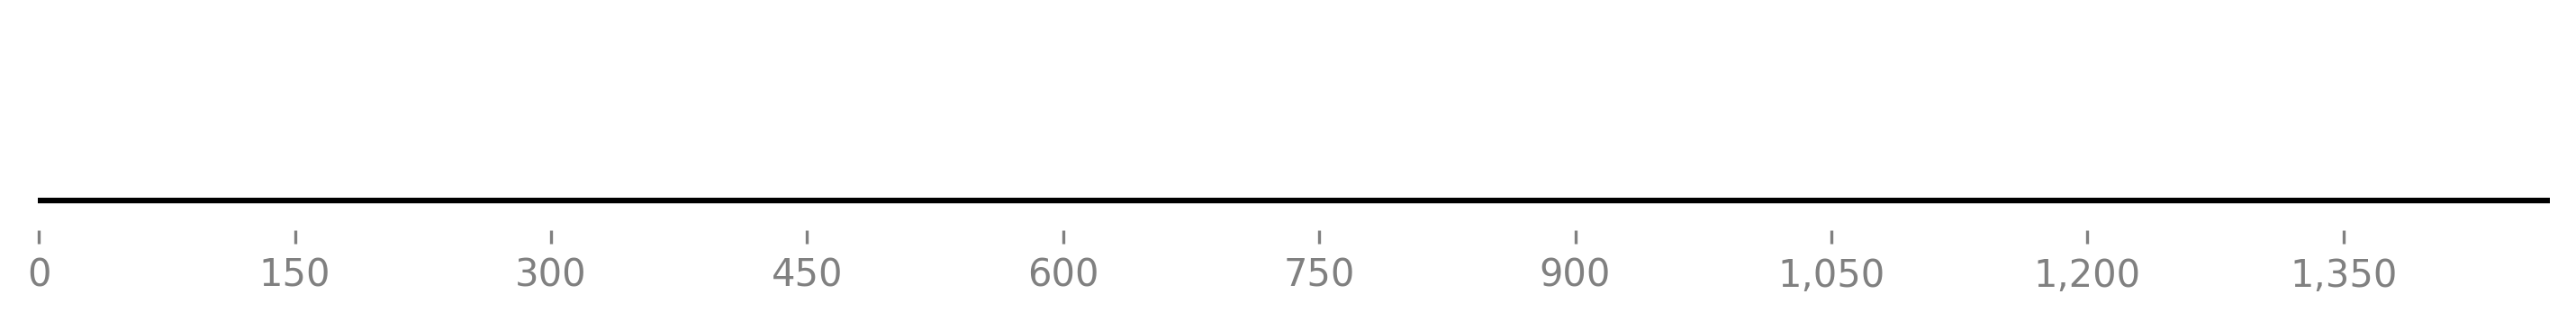

In [29]:
features = []

# for position in cds_variant_positions:
#     features.append(GraphicFeature(start=position, 
#                                    end=position+0.1, color="#ffd700", strand = -1,
#                    label= None))
    
# features.append(GraphicFeature(start=1, 
#                                    end=2, color="#ffd700", strand = -1,
#                    label=None))

fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

record = GraphicRecord(sequence_length= cds_len, features=features)
record.plot(ax = ax1, figure_width=12);

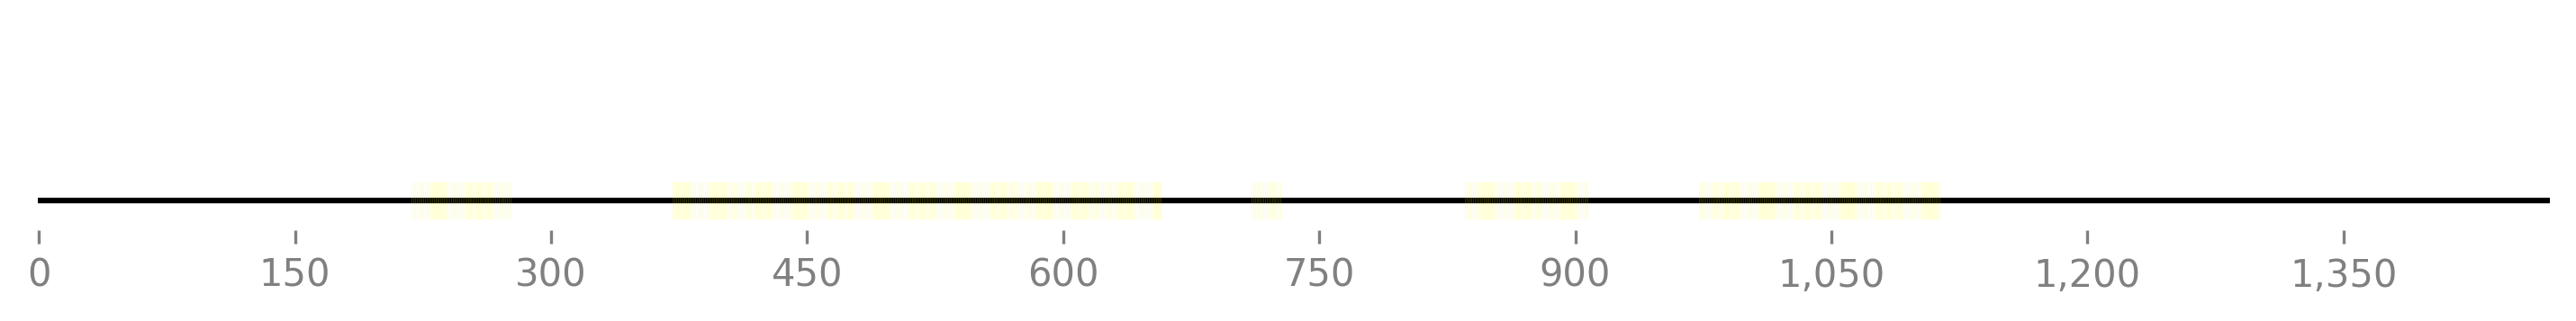

In [31]:
features = []

for position in AD_positions:
    features.append(GraphicFeature(start=position, 
                                   end=position + 0.1, color="yellow", strand = 0, label= None, thickness = 10, linewidth = 0))

# for position in DBD_positions:
#     features.append(GraphicFeature(start=position, 
#                                    end=position + 0.1, color="blue", strand = 0, label= None, thickness = 10, linewidth = 0))
# # features.append(GraphicFeature(start=1, 
#                                    end=2, color="#ffd700", strand = -1,
#                    label=None))

fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

record = GraphicRecord(sequence_length= cds_len, features=features)
record.plot(ax = ax1, figure_width=12);

In [33]:
# features = []

# # for position in DBD_positions:
# #     features.append(GraphicFeature(start=position, 
# #                                    end=position + 0.1, color="blue", strand = 0, label= None, thickness = 10, linewidth = 0))
    
# # features.append(GraphicFeature(start=1, 
# #                                    end=2, color="#ffd700", strand = -1,
# #                    label=None))

# fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

# record = GraphicRecord(sequence_length= cds_len, features=features)
# record.plot(ax = ax1, figure_width=12);

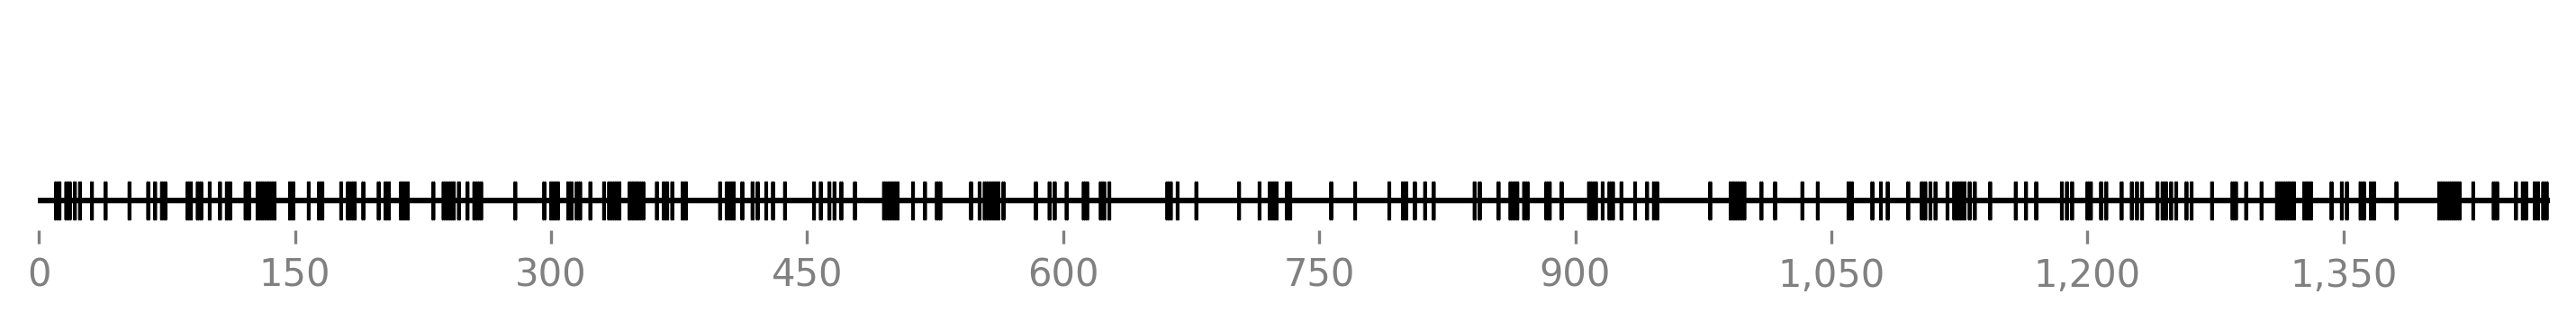

In [34]:
features = []

for position in cds_variant_positions:
    features.append(GraphicFeature(start=position, 
                                   end=position + 0.1, color="#ffd700", strand = 0, label= None, thickness = 10, linewidth = 0.5))
    
# features.append(GraphicFeature(start=1, 
#                                    end=2, color="#ffd700", strand = -1,
#                    label=None))

fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

record = GraphicRecord(sequence_length= cds_len, features=features)
record.plot(ax = ax1, figure_width=12);

In [35]:
known_ADs = pd.read_csv("../data/known_ADs.csv")
known_ADs = known_ADs[known_ADs["Gene"] == "ERG"]
ERG_ADs = known_ADs
ERG_ADs

,Unnamed: 0,Gene,Start,End,uniprotID,Reference
151,151,ERG,440,486,P11308,"PMID: 9681824, Soto"
152,152,ERG,125,261,P11308,"PMID: 14603248, Soto / Stanford"


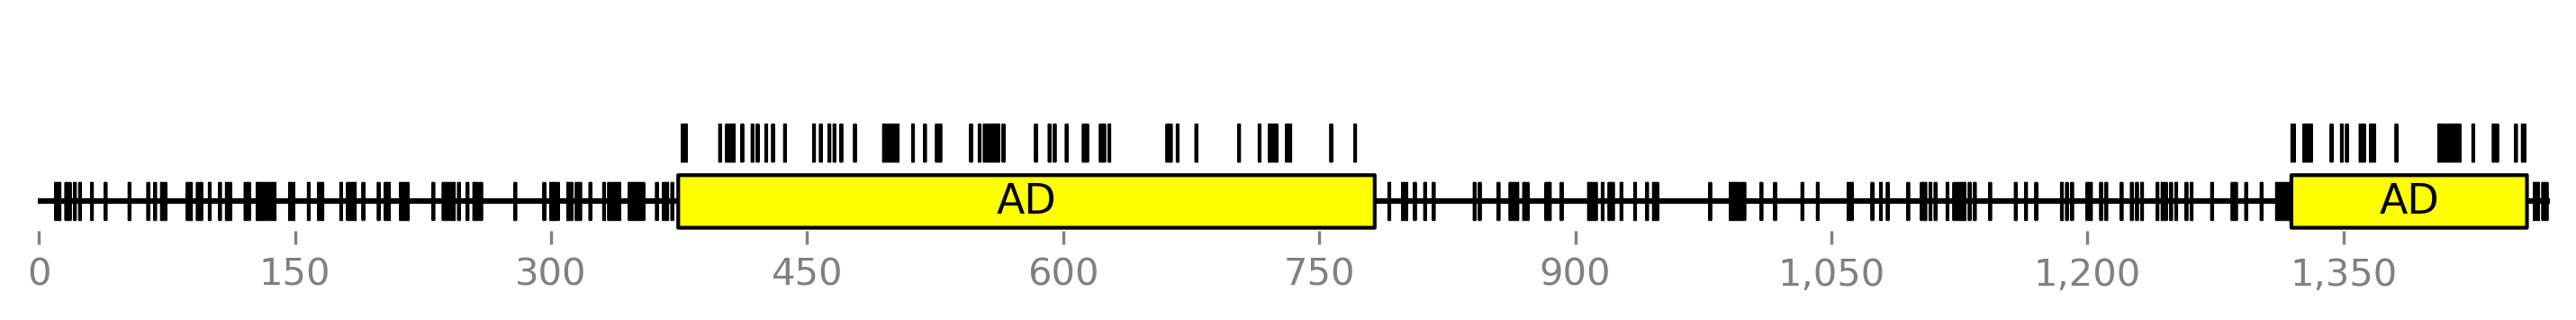

In [87]:
features = []

for i in ERG_ADs.index:
    features.append(GraphicFeature(start=ERG_ADs["Start"][i] * 3, 
                                   end=ERG_ADs["End"][i] * 3, color="yellow", strand = 0,
                   label= "AD"))

for position in cds_variant_positions:
    features.append(GraphicFeature(start=position, 
                                   end=position + 0.1, color="#ffd700", strand = 0, label= None, thickness = 10, linewidth = 0.5))
    

fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

record = GraphicRecord(sequence_length= cds_len, features=features)
record.plot(ax = ax1, figure_width=12);

In [36]:
# DBDs = pd.read_csv("../soto_analysis/data/DBD_coords_SFARI_TFs_with_ADs_and_DBDs.csv")
# DBDs

In [37]:
# ERG_DBDs = DBDs[DBDs["uniprotID"] == ERG_uniprotID]
# ERG_DBDs

In [38]:
# features = []

# for i in ERG_ADs.index:
#     features.append(GraphicFeature(start=ERG_ADs["Start"][i] * 3, 
#                                    end=ERG_ADs["End"][i] * 3, color="yellow", strand = 0,
#                    label= "AD"))

# features.append(GraphicFeature(start=311 * 3, 
#                                    end=391 * 3, color="blue", strand = 0, label= "DBD"))

# for position in cds_variant_positions:
#     features.append(GraphicFeature(start=position, 
#                                    end=position + 0.1, color="#ffd700", strand = 0, label= None, thickness = 10, linewidth = 0.5))    


# fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

# record = GraphicRecord(sequence_length= cds_len, features=features)
# record.plot(ax = ax1, figure_width=12);